In [1]:
#initializing workspace
import pandas as pd
import matplotlib.pyplot as plt
import trxtools as tt
import os
from pyCRAC.Parsers import GTF2
import pyBigWig
import numpy as np
from trxtools.BigWig import *
from scipy.signal import argrelextrema

pathTAB = "../seq_references/Saccharomyces_cerevisiae.EF4.74.dna.toplevel.shortChrNames.tab"
pathGTF = "../seq_references/Saccharomyces_cerevisiae.EF4.74.shortChNames_with_PolIII_transcripts_extended_slop_intergenic_sort.gtf"
gtf = GTF2.Parse_GTF()
gtf.read_GTF(pathGTF)
gtf.read_TAB(pathTAB)

sequences = pd.read_csv(pathTAB, sep='\t',names=['chr','sequence'],index_col=0)
chr_len = sequences['sequence'].str.len()

pathDir = "../04_BigWig/"
pathMeta = "../06_metadata/"

dinucleotides = pd.read_csv(pathMeta+'/properties_of_dinucleotides.csv', index_col=0)
dinucleotides.index = dinucleotides.reset_index().index.astype(str)+"_"+dinucleotides.index

cleavage_sites = {"5' end" : (300),
                   'A0' : (300+609),
                   'A1' : (300+700),
                   'D'  : (300+2500),
                   'A2' : (300+2712),
                   'A3' : (300+2784),
                   'B1L': (300+2855),
                   'B1S': (300+2861),
                   'E'  : (300+3019),
                   'C1' : (300+3251),
                   'B2' : (300+6647),
                   'B0-1' : (300+6661),
                   'B0-2' : (300+6697),
                   'T1' : (300+6739)}

# print(gtf.strand("RDN37-1"), gtf.chromosome("RDN37-1"), gtf.chromosomeCoordinates("RDN37-1"))
# print(gtf.strand("RDN37-2"), gtf.chromosome("RDN37-2"), gtf.chromosomeCoordinates("RDN37-2"))

flank = 2000

seq1_flank = tt.methods.reverse_complement(sequences.loc['chrXII'][0][451785-flank:457732+flank])
seq2_flank = tt.methods.reverse_complement(sequences.loc['chrXII'][0][460922-flank:466869+flank])

#loading datasets

data_files_3end = [f for f in os.listdir(pathDir) if 'PROFILE_3end' in f and "polyA" not in f and "bw" in f]

print(len(os.listdir(pathDir)))
print(len(data_files_3end))

df01a_RDN371_datasets_3end = geneFromBigWig(gene_name="RDN37-1", data_path=pathDir, data_files=data_files_3end, gtf=gtf,ranges=flank)
s1_RDN371_sequence = df01a_RDN371_datasets_3end['nucleotide'] #kee[ for future use
df01b_RDN372_datasets_3end = geneFromBigWig(gene_name="RDN37-2", data_path=pathDir, data_files=data_files_3end, gtf=gtf,ranges=flank)
df01_RDN37_3end = df01a_RDN371_datasets_3end.drop('nucleotide',axis='columns') + df01b_RDN372_datasets_3end.drop('nucleotide',axis='columns')

/home/tturowski/TurowskiLab/trxtools/trxtools/profiles.py:220: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def binCollect3(s1=pd.Series(), lengths=[500,72,500], bins=[50, 10, 50]):
/home/tturowski/TurowskiLab/trxtools/trxtools/plotting.py:761: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def plotAndFolding(df=pd.DataFrame(),dG=pd.Series(), title="", start=None, stop=None,legend=True,


1287
250


/home/tturowski/TurowskiLab/trxtools/trxtools/BigWig.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_t1[name] = getSeqData(gene_name, data_path, name, gtf, ranges=ranges)
/home/tturowski/TurowskiLab/trxtools/trxtools/BigWig.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_t1[name] = getSeqData(gene_name, data_path, name, gtf, ranges=ranges)
/home/tturowski/TurowskiLab/trxtools/trxtools/BigWig.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

# Fig 2 Rpa12 role in termination

In [2]:
df11_Rpa135_wt_3end = tt.profiles.preprocess(df01b_RDN372_datasets_3end,
                                     let_in=['Rpa135HTP'], 
                                     let_out=['Rpa12dC',"noUV"],stats=True)

#should I use 'C20P3-TT171005_Rpa135HTP_wt_none_x_PROFILE_3end'?

df12_Rpa135_rpa12d_3end = tt.profiles.preprocess(df01b_RDN372_datasets_3end,
                                     let_in=['Rpa135HTP','Rpa12dC'],let_out=['C23P2'],stats=True)

Experiments: 
['seq3-EP240614_Rpa135HTP_wt_none_1_PROFILE_3end', 'C18P2-TT170123_Rpa135HTP_wt_none_1_PROFILE_3end', 'EP240614_Rpa135HTP_wt_none_1_PROFILE_3end', 'LP230802_Rpa135HTP_wt_none_1b_PROFILE_3end', 'LP230802_Rpa135HTP_nsi1d_none_1a_PROFILE_3end', 'EP240911_Rpa135HTP_rrp44D551N_none_5_PROFILE_3end', 'LP230802_Rpa135HTP_nsi1d_W303_none_1_PROFILE_3end', 'EP240806_Rpa135HTP_rrp44D551N_none_4_PROFILE_3end', 'LP230802_Rpa135HTP_nsi1d_none_2b_PROFILE_3end', 'LP230802_Rpa135HTP_wt_none_1a_PROFILE_3end', 'C23P2-TT181022_Rpa135HTP_wt_none_2_PROFILE_3end', 'LP221214_Rpa135HTP_wt_none_2_PROFILE_3end', 'LP230802_Rpa135HTP_nsi1d_none_1b_PROFILE_3end', 'LP230405_Rpa135HTP_nsi1d_none_1_PROFILE_3end', 'EP190925_Rpa135HTP_wt_none_3_PROFILE_3end', 'LP230405_Rpa135HTP_nsi1d_none_2_PROFILE_3end', 'EP240918_Rpa135HTP_rrp44D551N_none_6_PROFILE_3end', 'LP230405_Rpa135HTP_wt_none_1_PROFILE_3end', 'LP230802_Rpa135HTP_nsi1d_none_2a_PROFILE_3end']
Experiments: 
['LP230802_Rpa135HTP_Rpa12dC-nsi1d_none_2a_

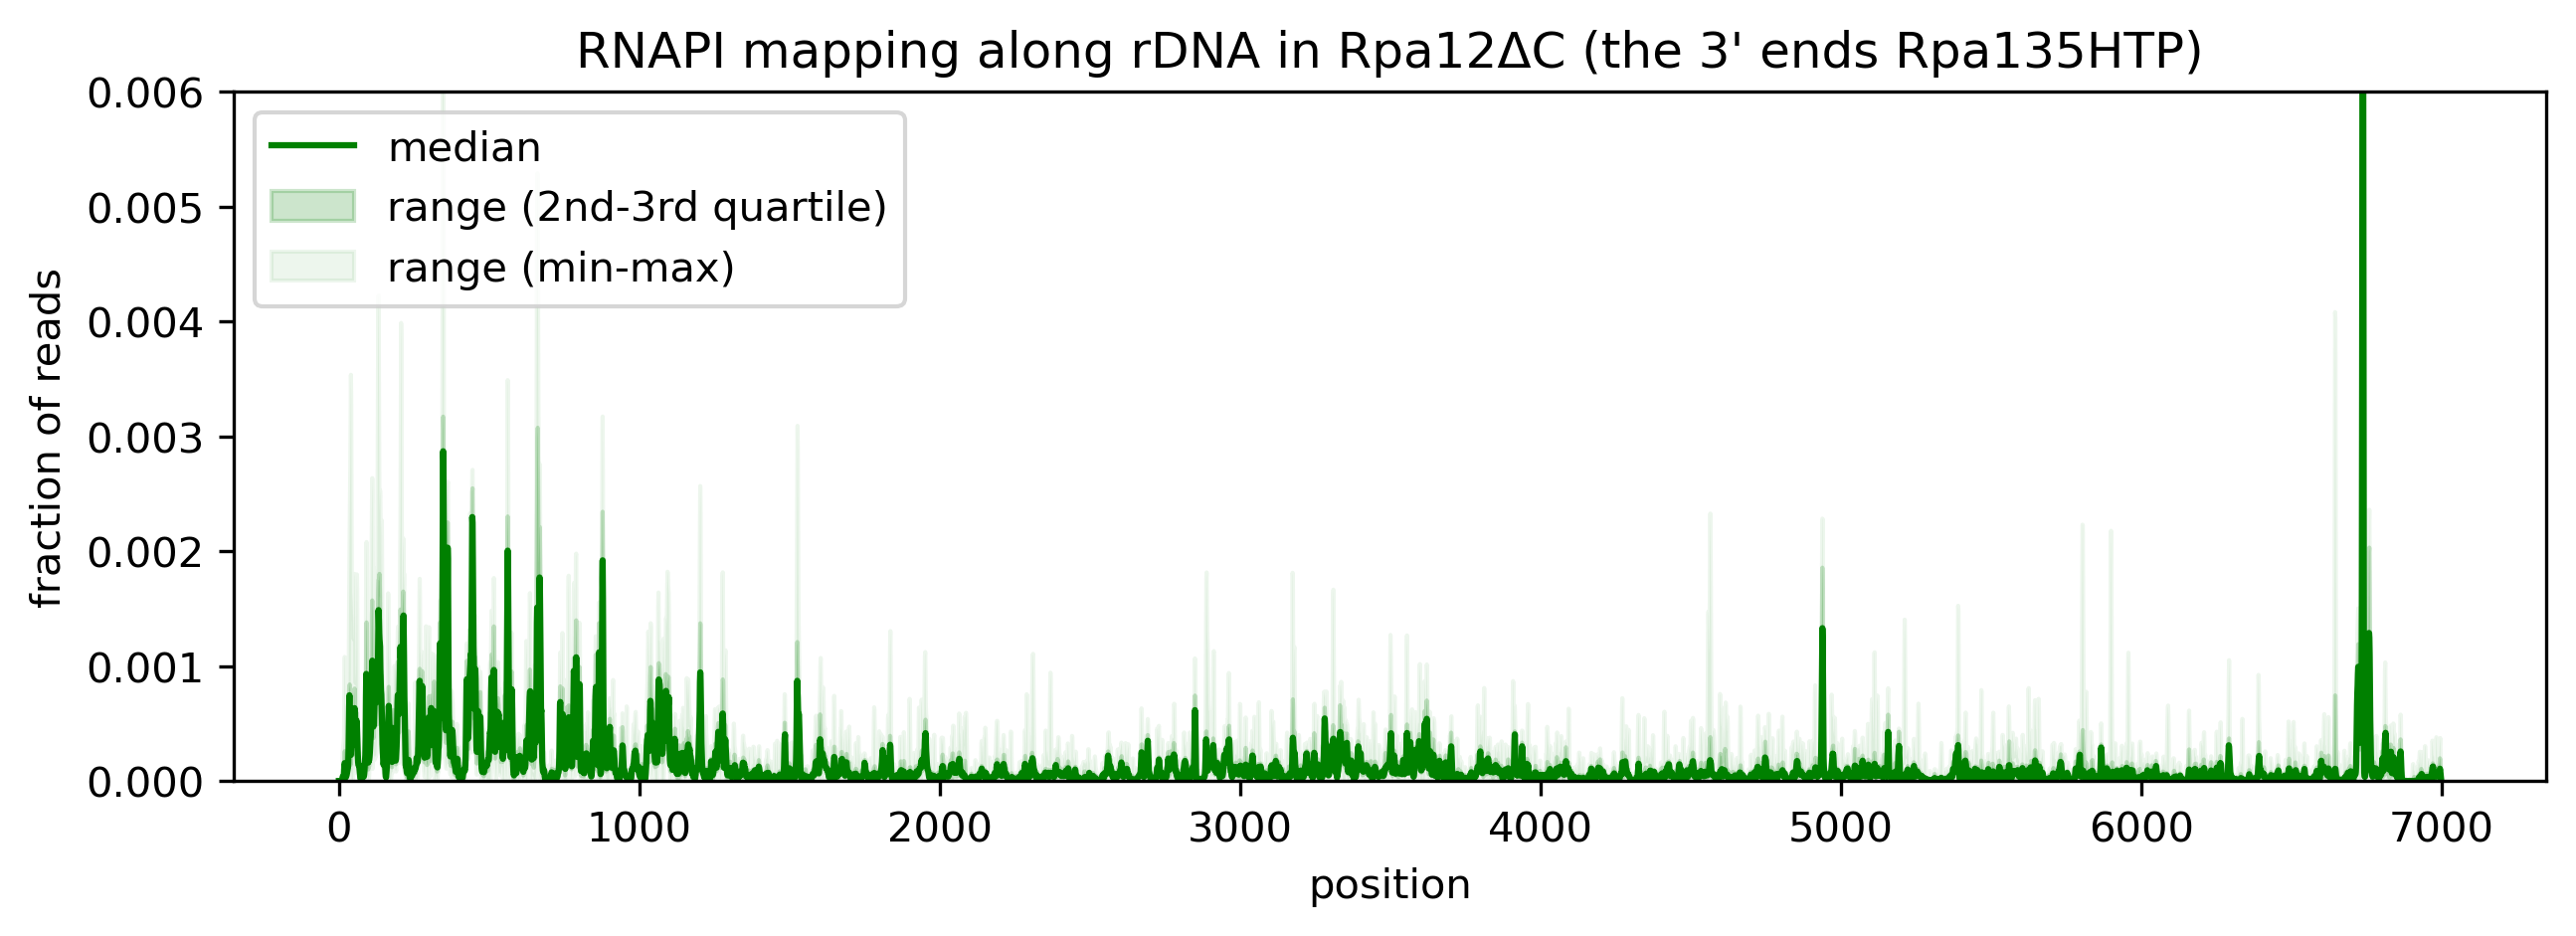

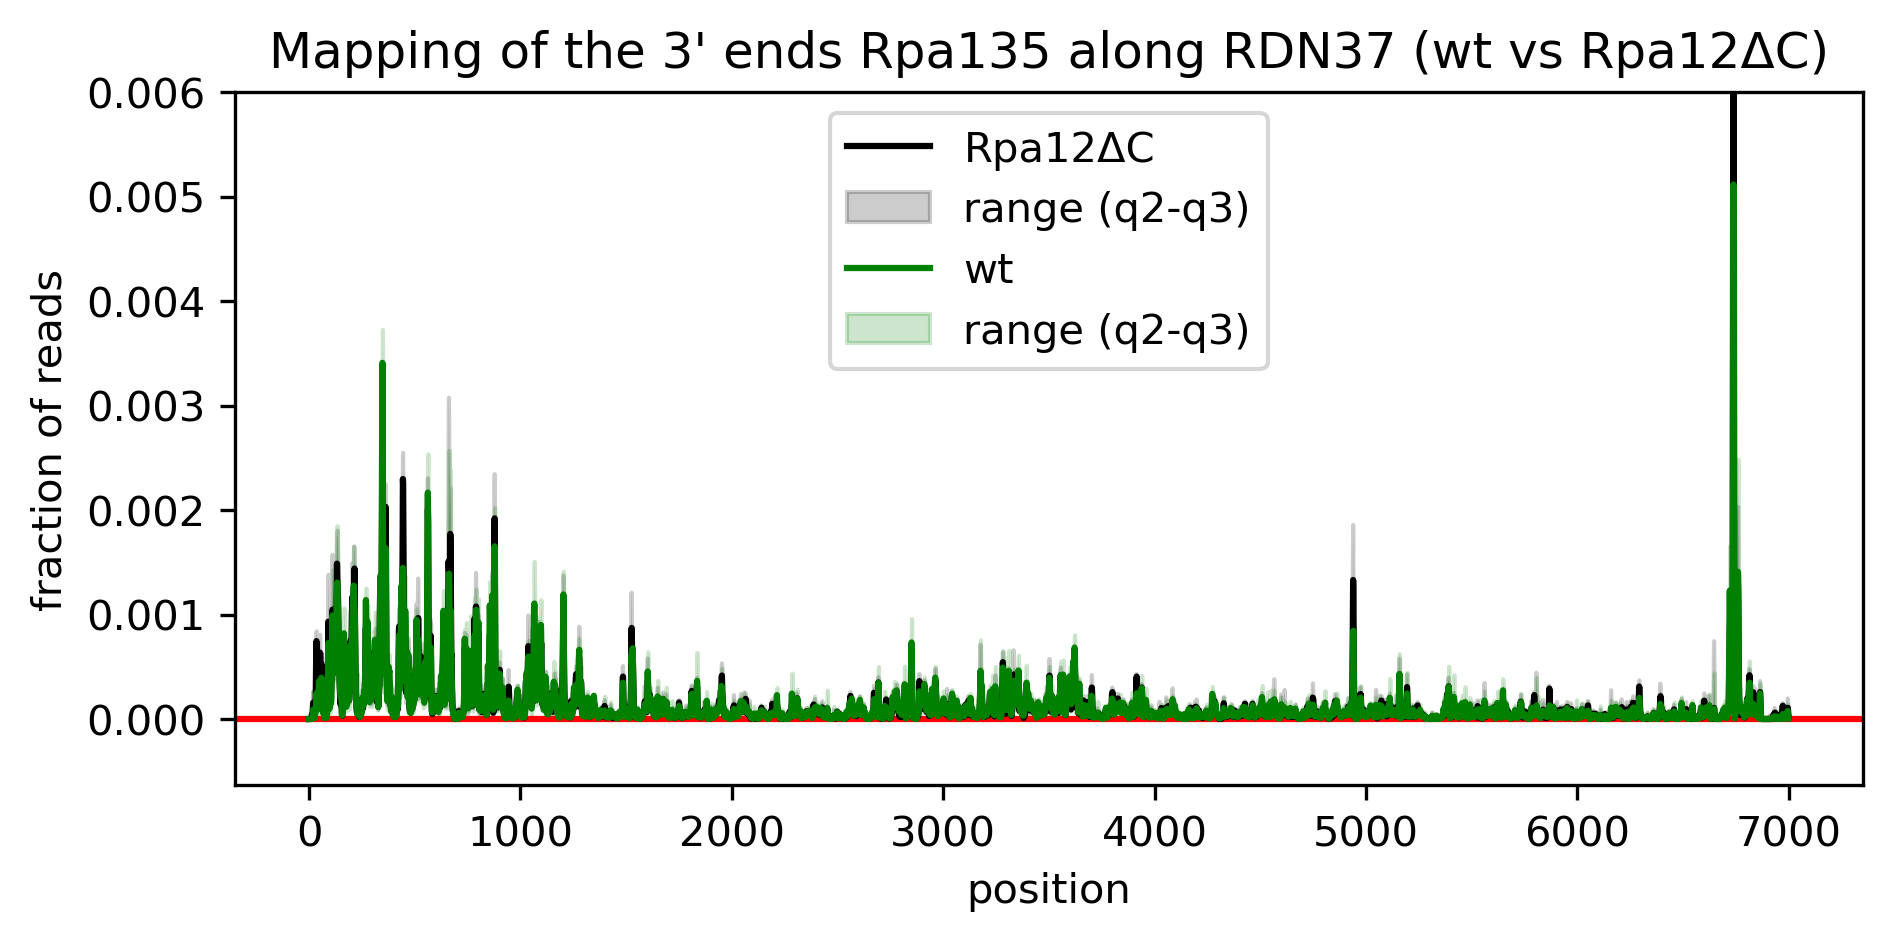

In [23]:
tt.plotting.plot_as_box_plot(df12_Rpa135_rpa12d_3end, figsize=(10,3), title="RNAPI mapping along rDNA in Rpa12ΔC (the 3' ends Rpa135HTP)",
                             start=1300,stop=8300,
                             dpi=300,ylim=(None,0.006),offset=1300,fname='Fig_S2B.png')

tt.plotting.plot_to_compare(ref=df11_Rpa135_wt_3end, df=df12_Rpa135_rpa12d_3end,figsize=(7,3),ref_label="wt",label="Rpa12ΔC",
                           title="Mapping of the 3' ends Rpa135 along RDN37 (wt vs Rpa12ΔC)",
                           dpi=300,offset=1300, ylim=(None,0.006),
                           start=1300,stop=8300, fname='Fig_S2Bv2.png')

/home/tturowski/TurowskiLab/trxtools/trxtools/profiles.py:437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_min'][differences_df['ref_above_exp'] > 0] = differences_df['exp_max']
/home/tturowski/TurowskiLab/trxtools/trxtools/profiles.py:438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_max'][differences_df['ref_above_exp'] > 0] = differences_df['ref_min']
/home/tturowski/TurowskiLab/trxtools/trxtools/profiles.py:439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

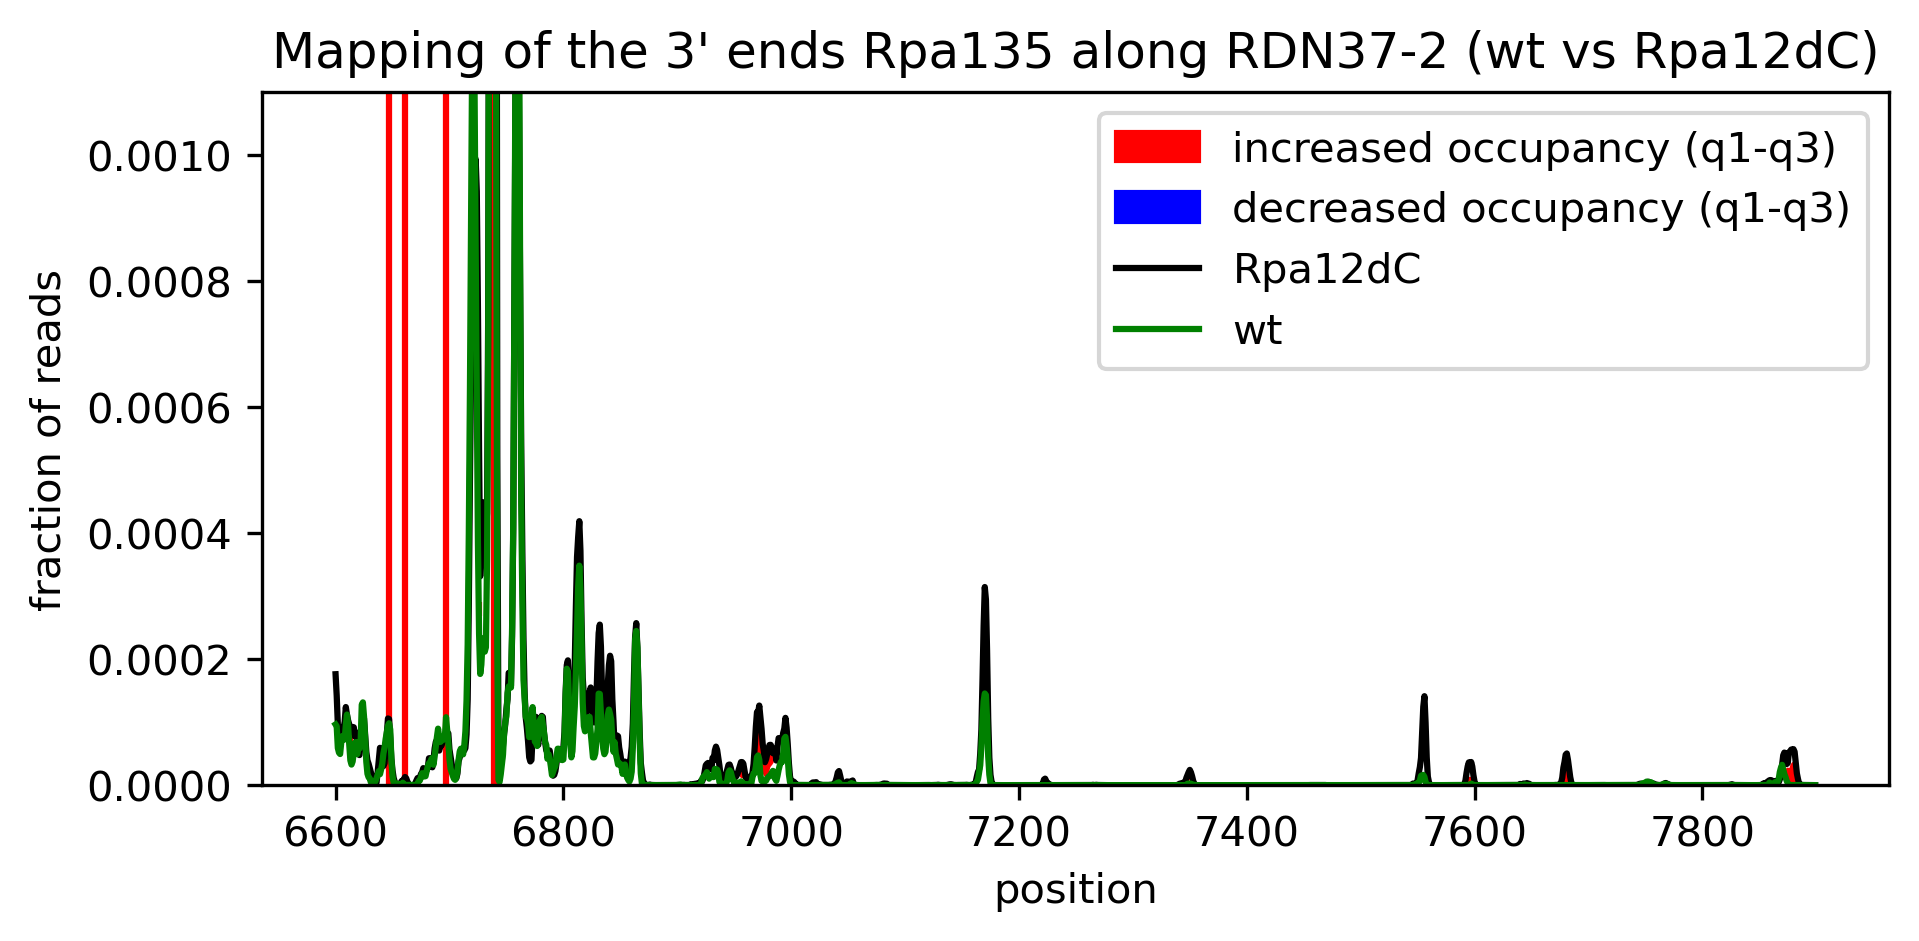

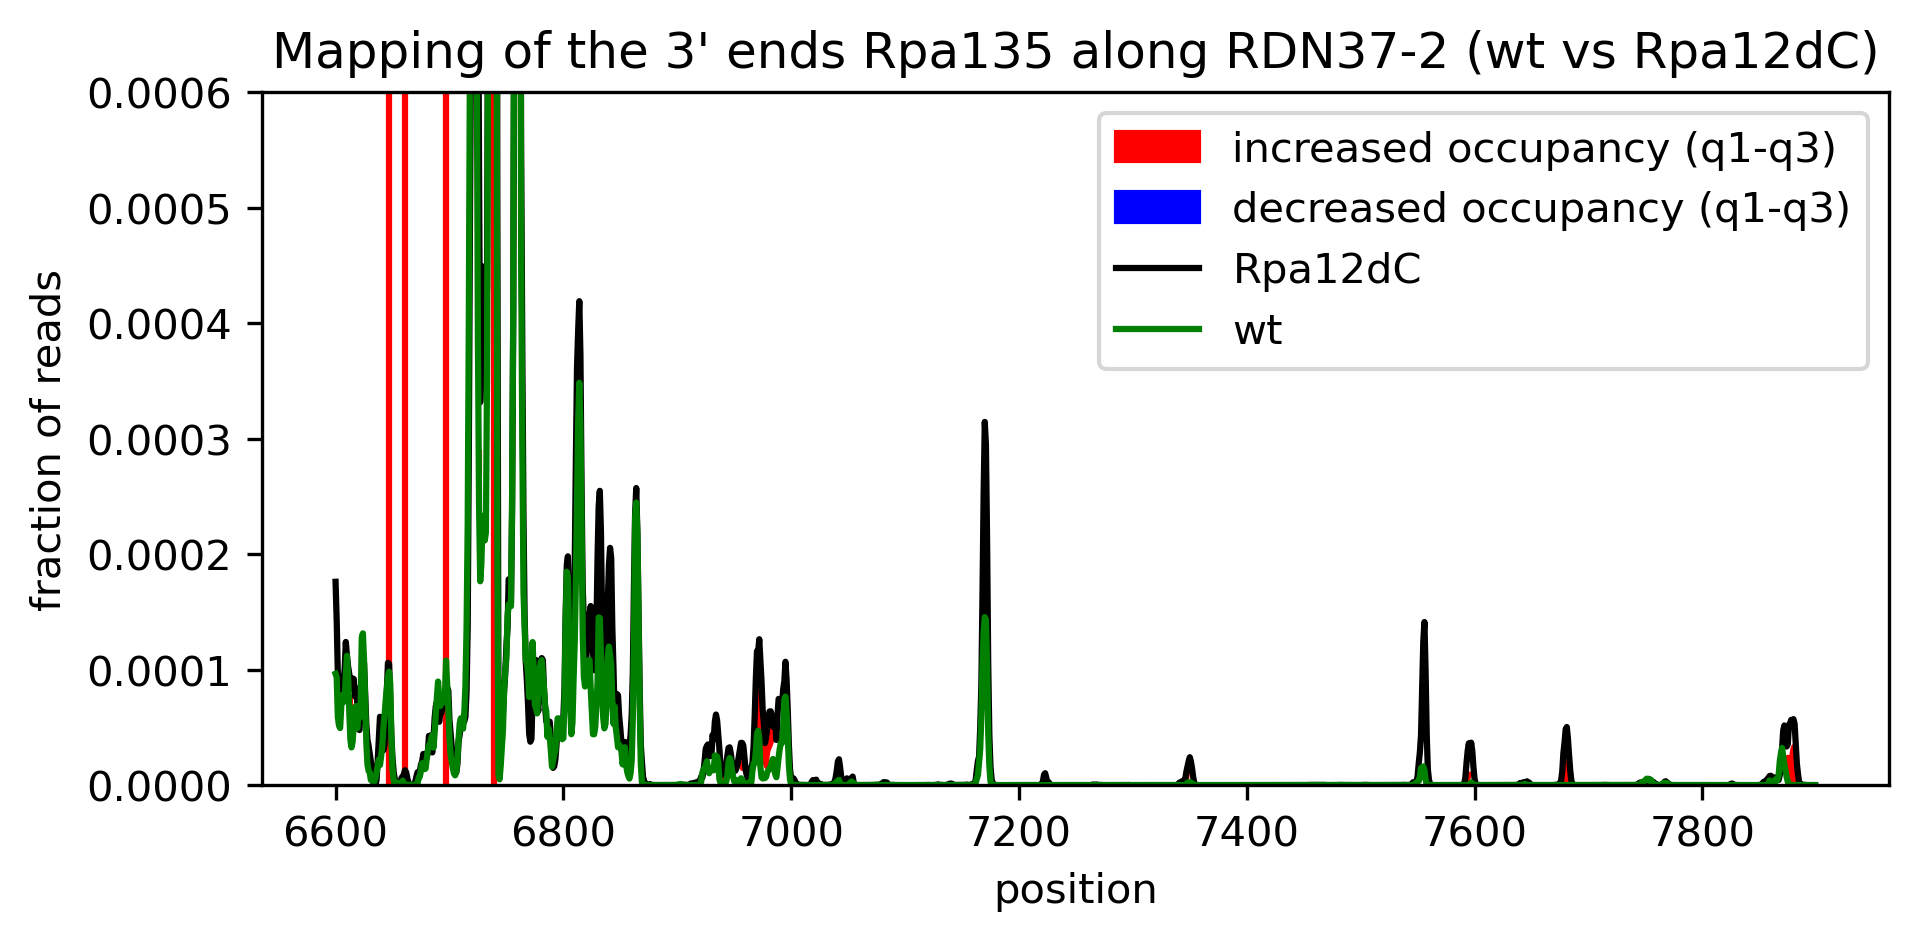

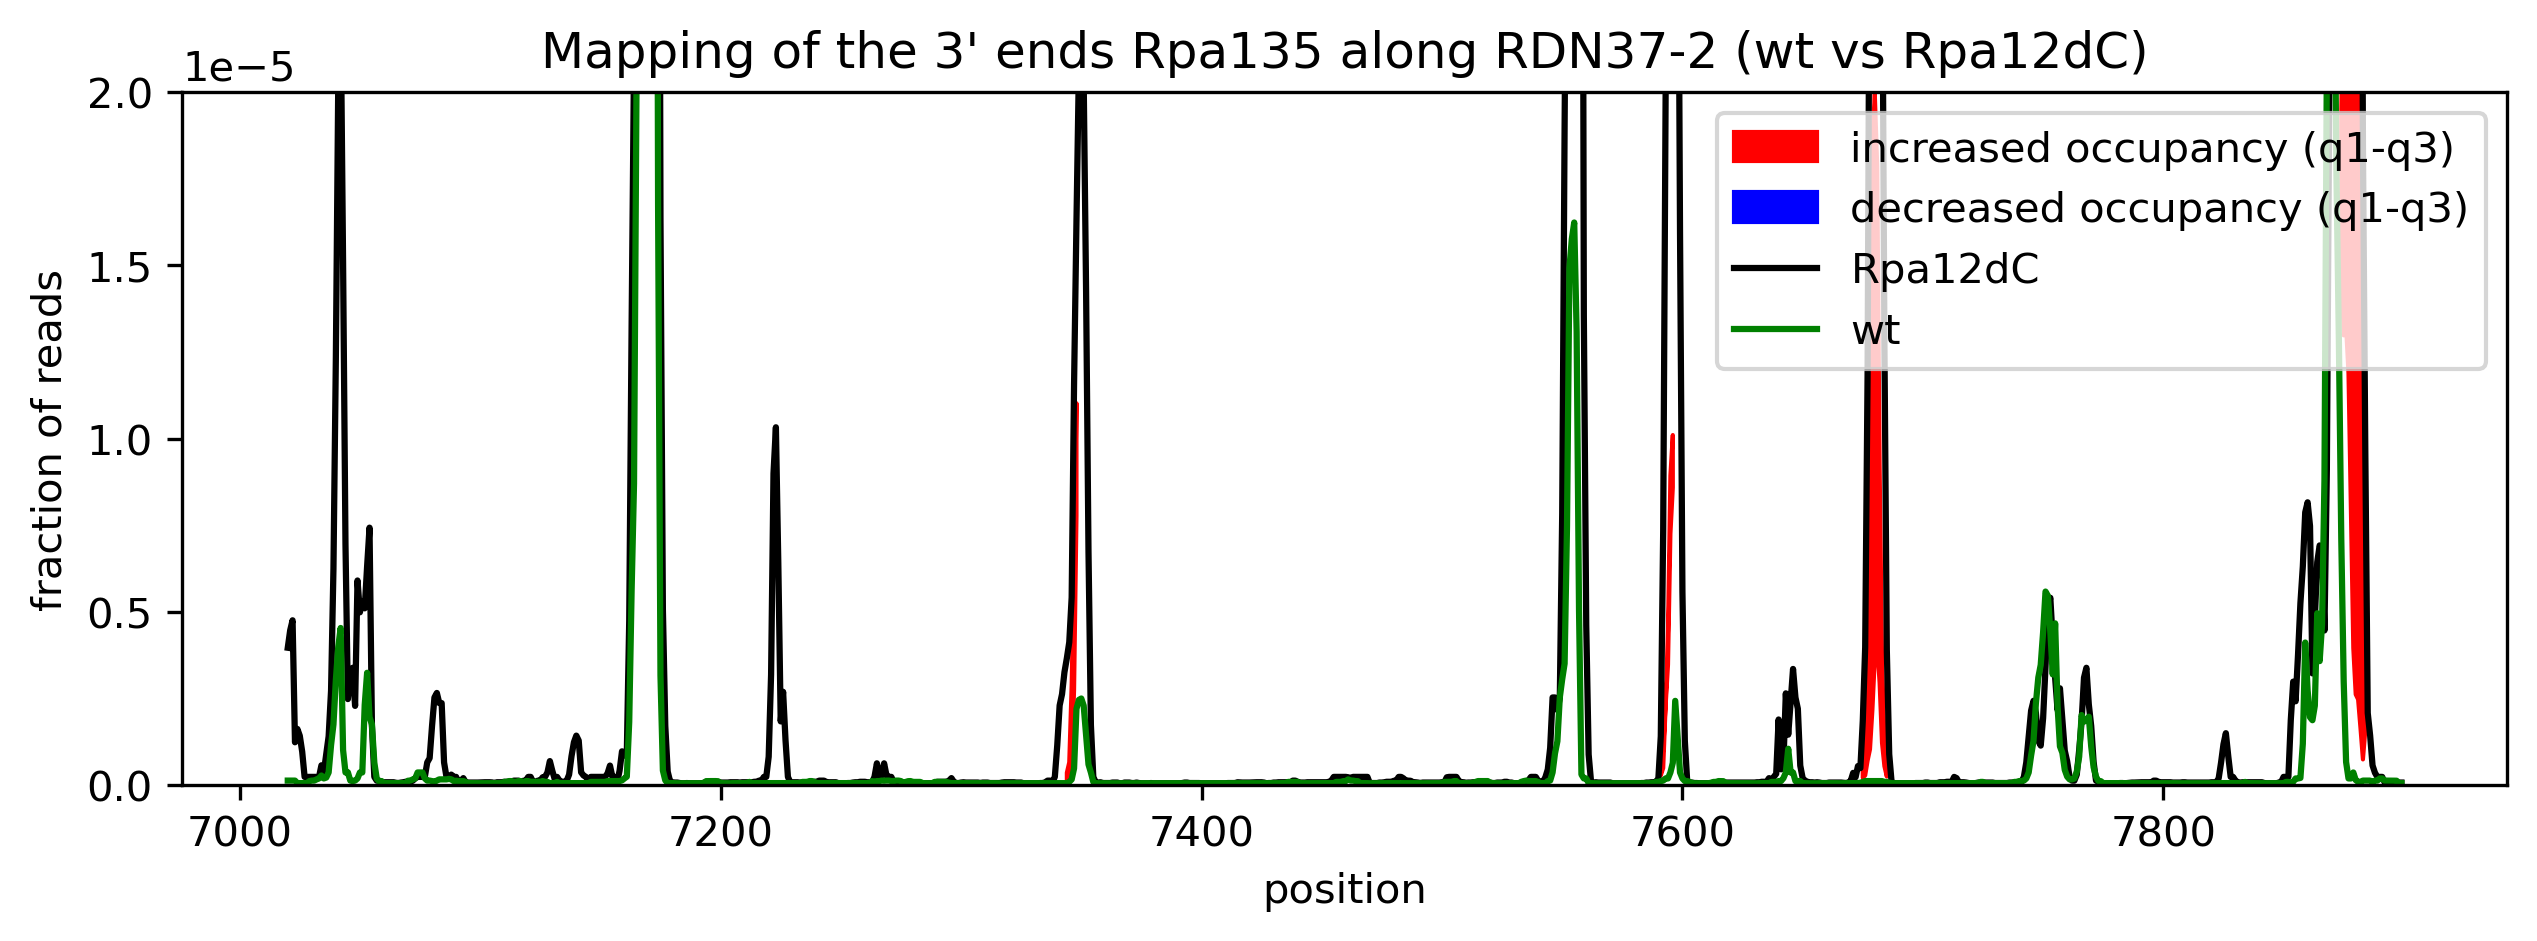

In [9]:
start=6600+1300
stop=7900+1300


# tt.plotting.plot_to_compare(ref=df11_Rpa135_wt_3end, df=df12_Rpa135_rpa12d_3end,figsize=(7,3),ref_label="wt",label="Rpa12dC",
#                            title="Mapping of the 3' ends Rpa135 along RDN37-2 (wt vs Rpa12dC)",
#                            dpi=300,offset=1300, ylim=(0,0.0005),
#                            start=start, stop=stop, fname='Fig_xB.png')

# tt.plotting.plot_to_compare(ref=df11_Rpa135_wt_3end, df=df12_Rpa135_rpa12d_3end,figsize=(5,3),ref_label="wt",label="Rpa12dC",
#                            title="Mapping of the 3' ends Rpa135 along RDN37-2 (wt vs Rpa12dC)",
#                            dpi=300,offset=1300, ylim=(0,0.00001),
#                            start=300+7020, stop=stop, fname='Fig_xB.png')

# tt.plotting.plot_diff(ref=df11_Rpa135_wt_3end, dataset=df12_Rpa135_rpa12d_3end,figsize=(7,3),label1="wt",label2="Rpa12dC",
#                            title="Mapping of the 3' ends Rpa135 along RDN37-2 (wt vs Rpa12dC)",plot_ranges=False,
#                            dpi=300,offset=1300, ylim=(0,0.002),ranges='qq',
#                            start=start, stop=stop, fname='Fig_2Dv1.png')

tt.plotting.plot_diff(ref=df11_Rpa135_wt_3end, dataset=df12_Rpa135_rpa12d_3end,figsize=(7,3),label1="wt",label2="Rpa12ΔC",
                           title="Mapping of the 3' ends Rpa135 along RDN37-2 (wt vs Rpa12ΔC)",plot_ranges=False,
                           dpi=300,offset=1300, ylim=(0,0.0011),ranges='qq',
                           h_lines=[i-300 for i in cleavage_sites.values()],
                           start=start, stop=stop, fname='Fig_2D.png')

tt.plotting.plot_diff(ref=df11_Rpa135_wt_3end, dataset=df12_Rpa135_rpa12d_3end,figsize=(7,3),label1="wt",label2="Rpa12ΔC",
                           title="Mapping of the 3' ends Rpa135 along RDN37-2 (wt vs Rpa12ΔC)",plot_ranges=False,
                           dpi=300,offset=1300, ylim=(0,0.0006),ranges='qq',
                           h_lines=[i-300 for i in cleavage_sites.values()],
                           start=start, stop=stop, fname='Fig_2Dv.png')

tt.plotting.plot_diff(ref=df11_Rpa135_wt_3end, dataset=df12_Rpa135_rpa12d_3end,figsize=(10,3),label1="wt",label2="Rpa12ΔC",
                           title="Mapping of the 3' ends Rpa135 along RDN37-2 (wt vs Rpa12ΔC)",plot_ranges=False,
                           dpi=300,offset=1300, ylim=(0,0.00002),ranges='qq',
                           start=1300+7020, stop=stop, fname='Fig_S2C.png')

/home/tturowski/TurowskiLab/trxtools/trxtools/profiles.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_min'][differences_df['ref_above_exp'] > 0] = differences_df['exp_max']
/home/tturowski/TurowskiLab/trxtools/trxtools/profiles.py:416: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_max'][differences_df['ref_above_exp'] > 0] = differences_df['ref_min']
/home/tturowski/TurowskiLab/trxtools/trxtools/profiles.py:417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

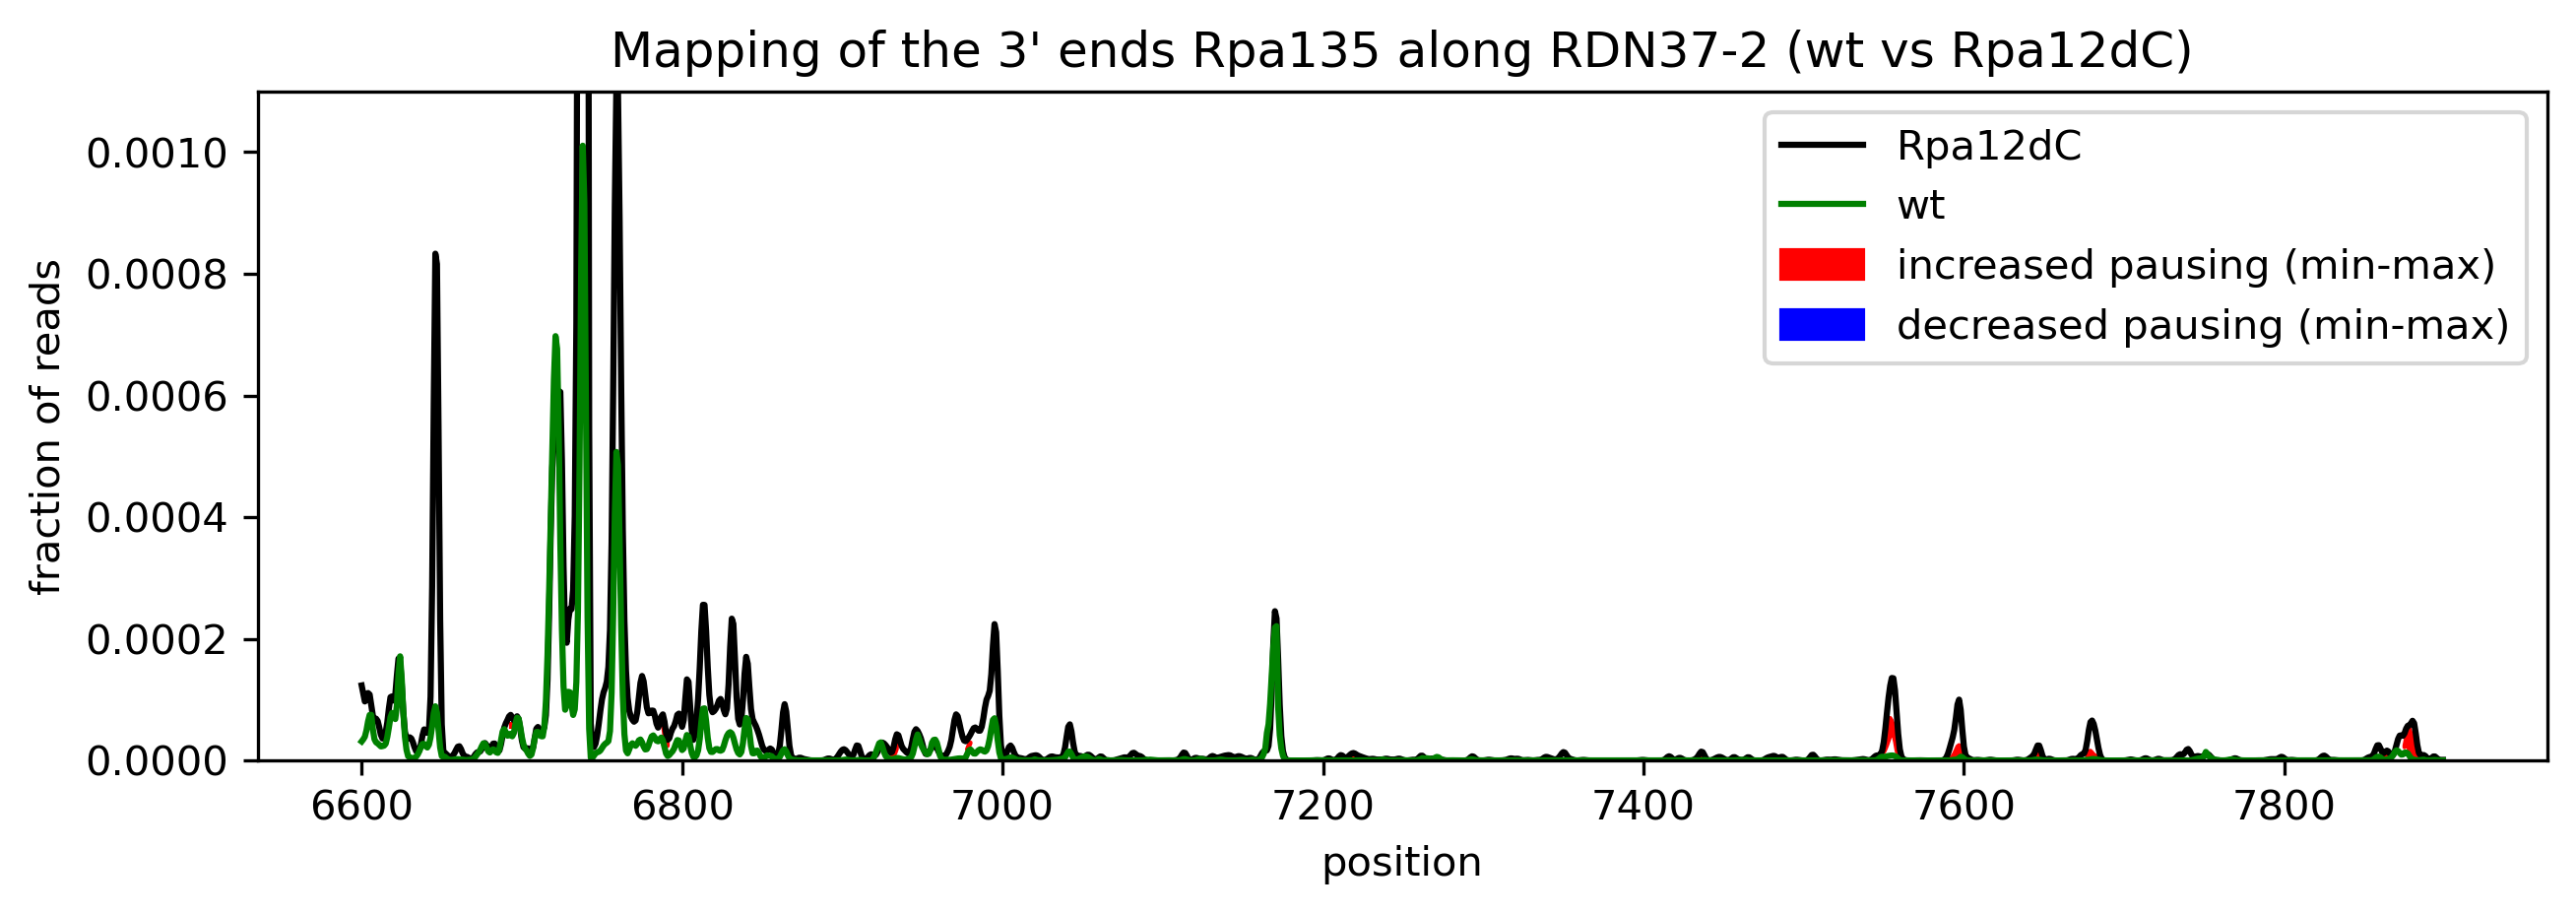

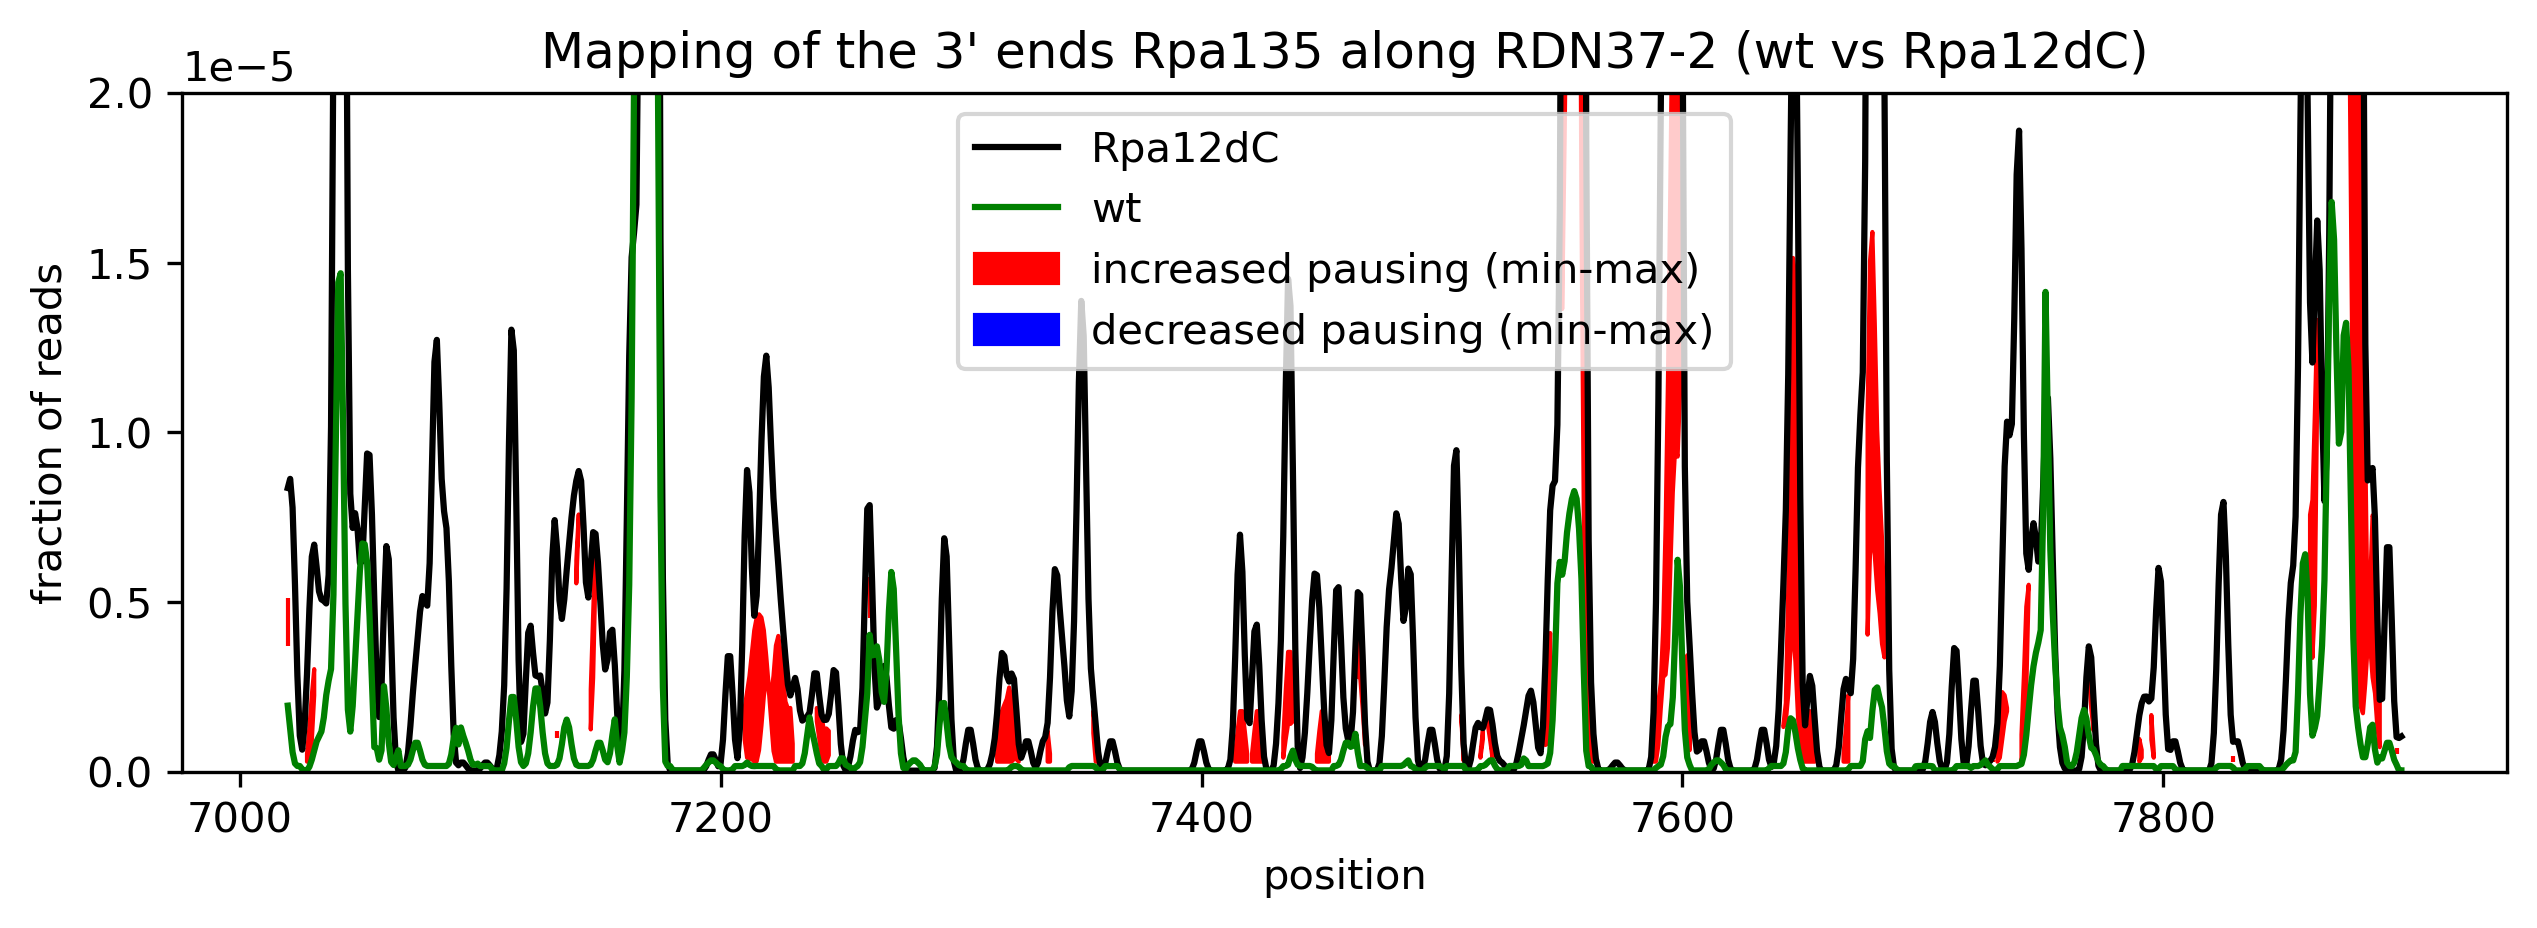

In [3]:
start=6600+1300
stop=7900+1300

# tt.plotting.plot_to_compare(ref=df11_Rpa135_wt_3end, df=df12_Rpa135_rpa12d_3end,figsize=(7,3),ref_label="wt",label="Rpa12dC",
#                            title="Mapping of the 3' ends Rpa135 along RDN37-2 (wt vs Rpa12dC)",
#                            dpi=300,offset=1300, ylim=(0,0.002),
#                            start=start, stop=stop, fname='Fig_xA.png')

# tt.plotting.plot_to_compare(ref=df11_Rpa135_wt_3end, df=df12_Rpa135_rpa12d_3end,figsize=(7,3),ref_label="wt",label="Rpa12dC",
#                            title="Mapping of the 3' ends Rpa135 along RDN37-2 (wt vs Rpa12dC)",
#                            dpi=300,offset=300, ylim=(0,0.0005),
#                            start=start, stop=stop, fname='Fig_xB.png')

# tt.plotting.plot_to_compare(ref=df11_Rpa135_wt_3end, df=df12_Rpa135_rpa12d_3end,figsize=(5,3),ref_label="wt",label="Rpa12dC",
#                            title="Mapping of the 3' ends Rpa135 along RDN37-2 (wt vs Rpa12dC)",
#                            dpi=300,offset=300, ylim=(0,0.00001),
#                            start=300+7020, stop=stop, fname='Fig_xB.png')

# tt.plotting.plot_diff(ref=df11_Rpa135_wt_3end, dataset=df12_Rpa135_rpa12d_3end,figsize=(7,3),label1="wt",label2="Rpa12dC",
#                            title="Mapping of the 3' ends Rpa135 along RDN37-2 (wt vs Rpa12dC)",plot_ranges=False,
#                            dpi=300,offset=1300, ylim=(0,0.002),ranges='mm',
#                            start=start, stop=stop, fname='Fig_2Dv1.png')

tt.plotting.plot_diff(ref=df11_Rpa135_wt_3end, dataset=df12_Rpa135_rpa12d_3end,figsize=(10,3),label1="wt",label2="Rpa12dC",
                           title="Mapping of the 3' ends Rpa135 along RDN37-2 (wt vs Rpa12dC)",plot_ranges=False,
                           dpi=300,offset=1300, ylim=(0,0.0011),ranges='mm',
                           h_lines=[i-300 for i in cleavage_sites.values()],
                           start=start, stop=stop, fname='Fig_2D.png')

tt.plotting.plot_diff(ref=df11_Rpa135_wt_3end, dataset=df12_Rpa135_rpa12d_3end,figsize=(10,3),label1="wt",label2="Rpa12dC",
                           title="Mapping of the 3' ends Rpa135 along RDN37-2 (wt vs Rpa12dC)",plot_ranges=False,
                           dpi=300,offset=1300, ylim=(0,0.00002),ranges='mm',
                           start=1300+7020, stop=stop, fname='Fig_S2C.png')

/home/tturowski/TurowskiLab/trxtools/trxtools/profiles.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_min'][differences_df['ref_above_exp'] > 0] = differences_df['exp_max']
/home/tturowski/TurowskiLab/trxtools/trxtools/profiles.py:416: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_max'][differences_df['ref_above_exp'] > 0] = differences_df['ref_min']
/home/tturowski/TurowskiLab/trxtools/trxtools/profiles.py:417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

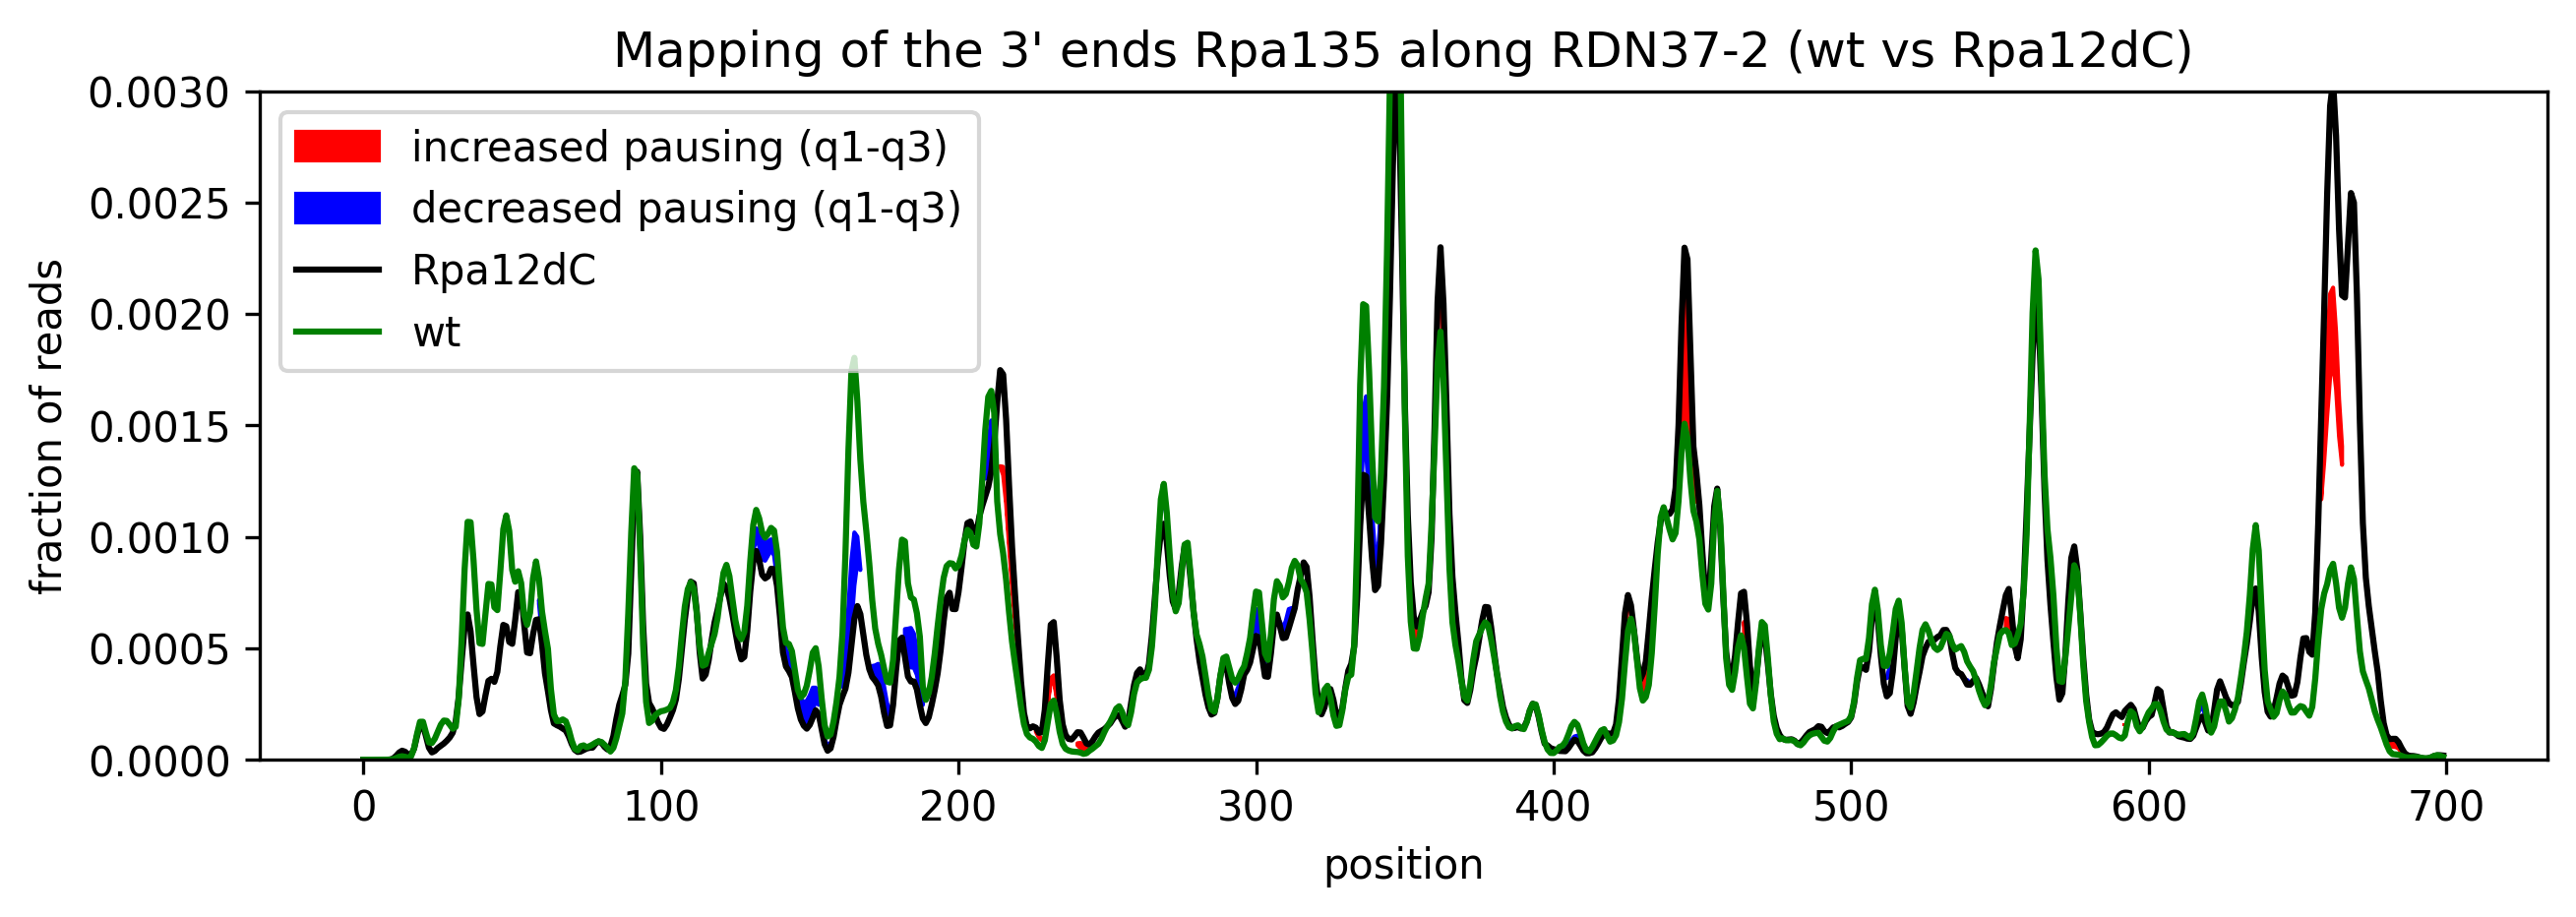

In [36]:
start = 0+1300
stop = 700+1300

tt.plotting.plot_diff(ref=df11_Rpa135_wt_3end, dataset=df12_Rpa135_rpa12d_3end,figsize=(10,3),label1="wt",label2="Rpa12dC",
                           title="Mapping of the 3' ends Rpa135 along RDN37-2 (wt vs Rpa12dC)",plot_ranges=False,
                           dpi=300,offset=1300, ylim=(0,0.003),ranges='qq',
                           start=start, stop=stop, fname='Fig_2F.png')

There is too high variability in the data to compare size of the termination peak. More replicates would be needed

In [5]:
# check kinetics of RNAPI wt and Rpa12dC  - sums, or tilted cumsum

7.815565950539702e-124
2.3617855885365887e-05


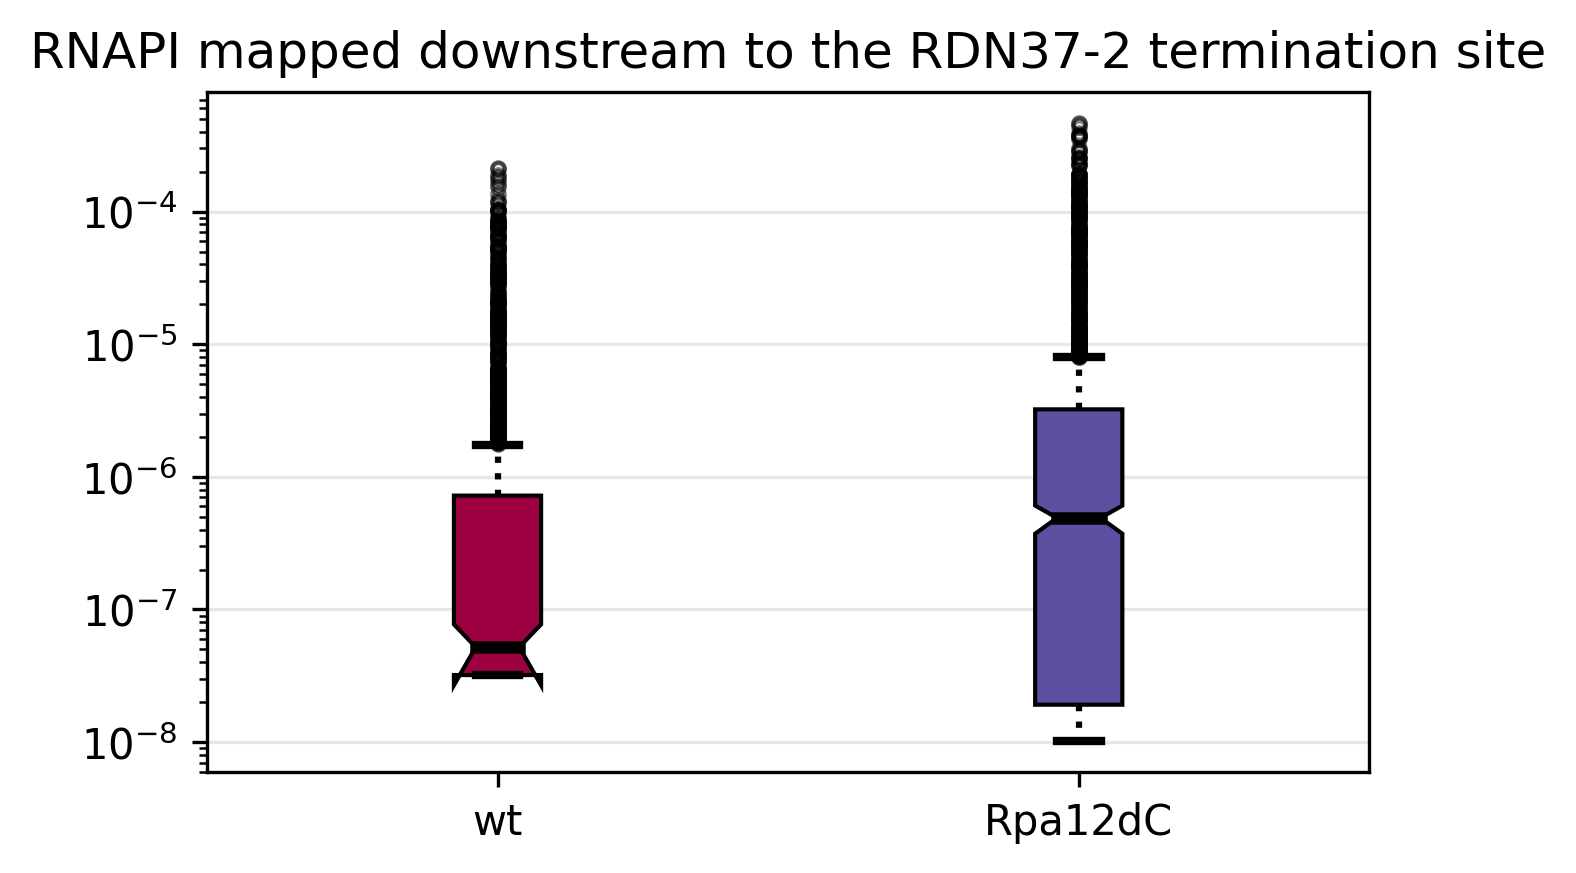

In [37]:
wt = df11_Rpa135_wt_3end[8100:] #60nt downstream the T1 site
a12dC = df12_Rpa135_rpa12d_3end[8100:]

data = [wt['median'].dropna().tolist(),a12dC['median'].dropna().tolist()]
labels=["wt","Rpa12dC"]

tt.plotting.boxplot1(data,labels,grid=True,log=True,figsize=(5,3),dpi=300,fname='Fig_2E.png',
                     title="RNAPI mapped downstream to the RDN37-2 termination site")

from scipy import stats

out = stats.wilcoxon(wt['median'].fillna(0.0),a12dC['median'].fillna(0.0))
print(out[1])
out = stats.ranksums(wt['median'].fillna(0.0),a12dC['median'].fillna(0.0))
print(out[1])

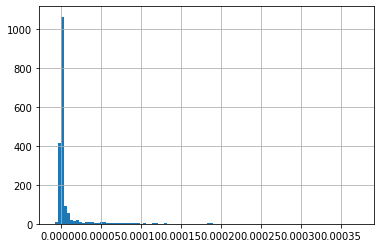

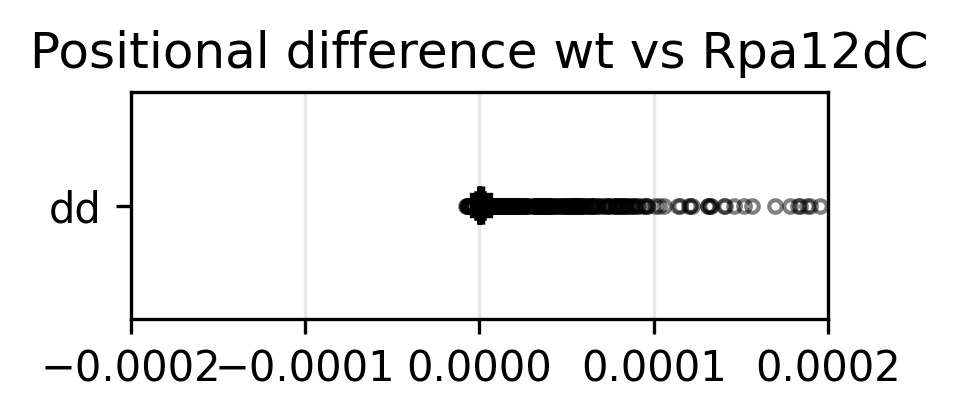

In [38]:
dd = a12dC['median']-wt['median']

dd.hist(bins=100)
plt.show()

tt.plotting.boxplot1(dd.dropna().tolist(),labels=["dd"],grid=True,figsize=(3,1),dpi=300,title="Positional difference wt vs Rpa12dC",vert=0,lim=(-0.0002,0.0002))

Experiments: 
['C23P2-TT181022_Rpa135HTP_wt_none_2_PROFILE_3end', 'C18P2-TT170123_Rpa135HTP_wt_none_1_PROFILE_3end', 'EP190925_Rpa135HTP_wt_none_3_PROFILE_3end', 'LP221214_Rpa135HTP_wt_none_2_PROFILE_3end']
Experiments: 
['LP221214_Rpa135HTP_Rpa12dC_none_3_PROFILE_3end', 'LP221214_Rpa135HTP_Rpa12dC_none_4_PROFILE_3end', 'EP190925_Rpa135HTP_Rpa12dC_none_2_PROFILE_3end']


/tmp/ipykernel_850/1352527218.py:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  data = [col.dropna().tolist() for c,col in pd.concat([df13_wt,df14_rpa12d]).iteritems()]


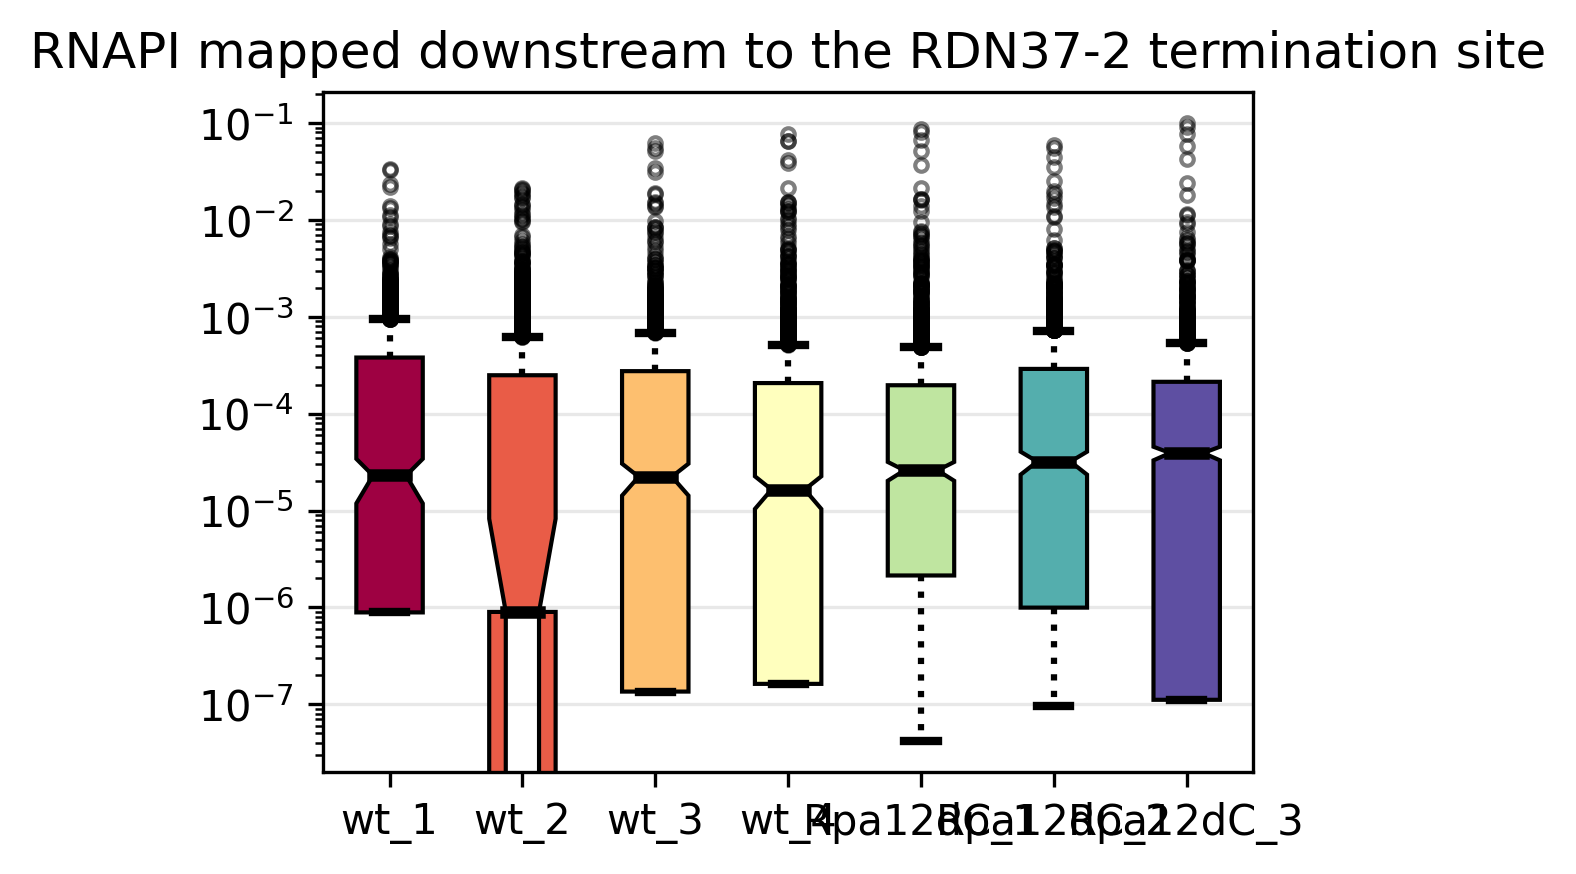

In [54]:
stop = 9946
df13_wt = tt.profiles.preprocess(df01b_RDN372_datasets_3end[7100:stop],
                                     let_in=['Rpa135HTP'], 
                                     let_out=['Rpa12dC',"noUV"],stats=False)

df14_rpa12d = tt.profiles.preprocess(df01b_RDN372_datasets_3end[7100:stop],
                                     let_in=['Rpa135HTP','Rpa12dC'],let_out=['C23P2'],stats=False)

data = [col.dropna().tolist() for c,col in pd.concat([df13_wt,df14_rpa12d]).iteritems()]
labels = ['wt_1',"wt_2","wt_3","wt_4","Rpa12dC_1","Rpa12dC_2","Rpa12dC_3"]

tt.plotting.boxplot1(data,labels,grid=True,log=True,figsize=(4,3),dpi=300,title="RNAPI mapped downstream to the RDN37-2 termination site")

Experiments: 
['C23P2-TT181022_Rpa135HTP_wt_none_2_PROFILE_3end', 'C18P2-TT170123_Rpa135HTP_wt_none_1_PROFILE_3end', 'EP190925_Rpa135HTP_wt_none_3_PROFILE_3end', 'LP221214_Rpa135HTP_wt_none_2_PROFILE_3end']
Experiments: 
['LP221214_Rpa135HTP_Rpa12dC_none_3_PROFILE_3end', 'LP221214_Rpa135HTP_Rpa12dC_none_4_PROFILE_3end', 'EP190925_Rpa135HTP_Rpa12dC_none_2_PROFILE_3end']


/tmp/ipykernel_850/2477990435.py:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  data = [col.dropna().tolist() for c,col in pd.concat([df13_wt,df14_rpa12d]).iteritems()]


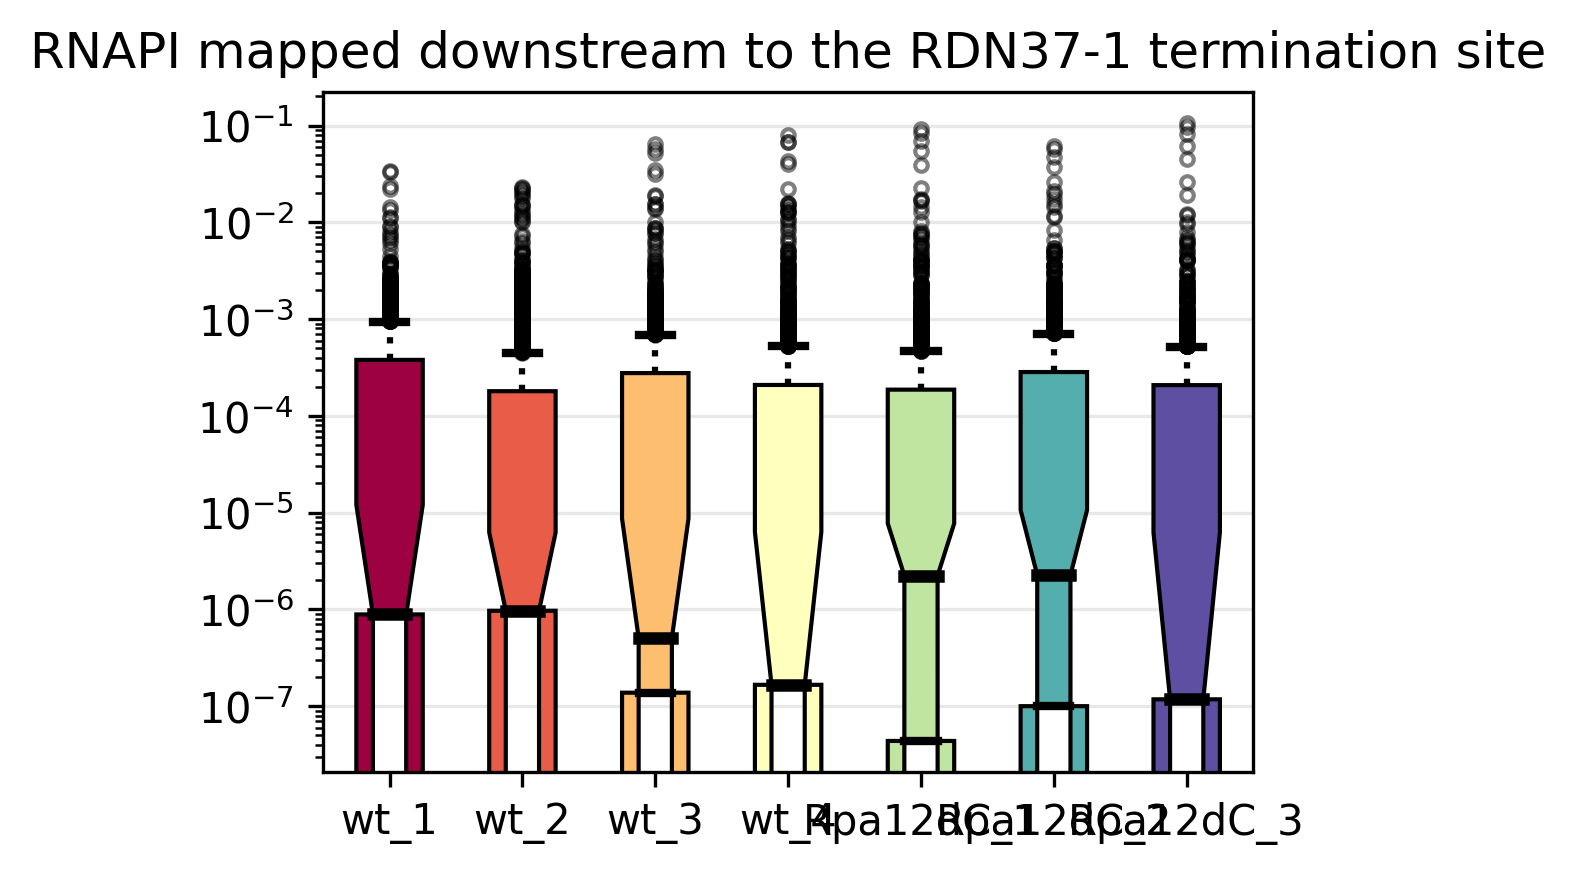

In [55]:
stop = 9946
df13_wt = tt.profiles.preprocess(df01a_RDN371_datasets_3end[7100:stop],
                                     let_in=['Rpa135HTP'], 
                                     let_out=['Rpa12dC',"noUV"],stats=False)

df14_rpa12d = tt.profiles.preprocess(df01a_RDN371_datasets_3end[7100:stop],
                                     let_in=['Rpa135HTP','Rpa12dC'],let_out=['C23P2'],stats=False)

data = [col.dropna().tolist() for c,col in pd.concat([df13_wt,df14_rpa12d]).iteritems()]
labels = ['wt_1',"wt_2","wt_3","wt_4","Rpa12dC_1","Rpa12dC_2","Rpa12dC_3"]

tt.plotting.boxplot1(data,labels,grid=True,log=True,figsize=(4,3),dpi=300,title="RNAPI mapped downstream to the RDN37-1 termination site")